# Getting and Visualizing the Data

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
data = pd.read_csv('New_Data.csv')

X = data.iloc[:,:4]
Y = data['Name']

In [12]:
Y

(102,)

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
Cheek diff    102 non-null float64
Eye diff      102 non-null float64
Mouth diff    102 non-null float64
Nose diff     102 non-null float64
Name          102 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C590172E48>,
      dtype=object)

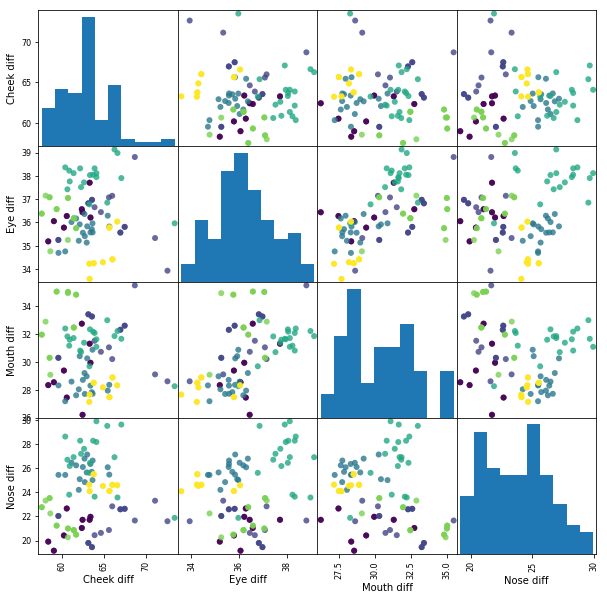

In [12]:

%matplotlib inline
from pandas.plotting import scatter_matrix

dataFrame = pd.DataFrame(X, columns=["Cheek diff", "Eye diff", "Mouth diff", "Nose diff"])
 #Gets us the first 5 feature names. 
scatter_matrix(X, figsize = (10, 10), c = Y, alpha = 0.8, marker = 'O')

In [13]:
X.shape

(102,)

In [506]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [507]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)
#Split the data into training and testing sets.

scaler = MinMaxScaler() #Scaling the data because sometimes, the data varies a lot(check X.describe())
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

In [508]:
X_train_org  #Original without scaling. (Values vary a lot)

,Cheek diff,Eye diff,Mouth diff,Nose diff
62,60.615265,37.423466,31.825390,26.722607
3,62.343075,36.565900,32.740740,21.042845
79,57.999382,37.151493,32.886536,23.324019
45,65.637634,35.823490,28.350840,25.481482
48,63.625416,35.961346,30.868720,25.025632
6,60.539448,36.274242,27.436200,22.663396
101,63.767593,34.244630,28.497920,25.515071
82,58.481846,37.079580,30.290754,23.526433
80,57.542847,36.378128,31.952623,22.768173
60,60.357246,38.365154,32.393116,28.647412


In [509]:
X_train

array([[0.20389115, 0.71184098, 0.6055244 , 0.72134174],
       [0.31855171, 0.55328295, 0.70404571, 0.1800717 ],
       [0.03029648, 0.66155505, 0.71973808, 0.39746305],
       [0.53718453, 0.41601647, 0.2315503 , 0.60306499],
       [0.40365015, 0.4415051 , 0.50255573, 0.55962339],
       [0.1988598 , 0.4993574 , 0.13310542, 0.33450699],
       [0.41308527, 0.12409617, 0.24738087, 0.60626596],
       [0.06231365, 0.64825883, 0.44034787, 0.4167527 ],
       [0.        , 0.51856521, 0.6192188 , 0.34449203],
       [0.18676855, 0.88595258, 0.66663011, 0.90477184],
       [0.48605981, 0.13235239, 0.21173669, 0.51318353],
       [0.37796555, 0.12025225, 0.09969105, 0.52364877],
       [0.06802322, 0.21904913, 0.30936722, 0.29532626],
       [0.21827341, 0.86048097, 0.5339451 , 0.4441282 ],
       [0.65950497, 0.41310071, 0.68854385, 0.33209281],
       [0.74043018, 0.96828788, 1.        , 0.23922623],
       [0.3794123 , 0.59214748, 0.37470051, 0.61727841],
       [0.25493909, 0.48197431,

In [528]:
dataFrame = pd.DataFrame(X_train, columns = ["Cheek diff", "Eye diff", "Mouth diff", "Nose diff"])
dataFrame

,Cheek diff,Eye diff,Mouth diff,Nose diff
0,0.203891,0.711841,0.605524,0.721342
1,0.318552,0.553283,0.704046,0.180072
2,0.030296,0.661555,0.719738,0.397463
3,0.537185,0.416016,0.231550,0.603065
4,0.403650,0.441505,0.502556,0.559623
5,0.198860,0.499357,0.133105,0.334507
6,0.413085,0.124096,0.247381,0.606266
7,0.062314,0.648259,0.440348,0.416753
8,0.000000,0.518565,0.619219,0.344492
9,0.186769,0.885953,0.666630,0.904772


In [15]:
import numpy as np
columns = X
target = Y
corr_list = []; #Correlation list- Which features have the biggest role in the accuracy of the model. Higher -> More important.
for i in range(0,4):
    corr_list.append(np.corrcoef(X_train[:,i], y_train)[0,1])#Get all the rows and the ith column.
print(corr_list)

NameError: name 'X_train' is not defined

# KNN Classifier

### Training KNN for different k's

In [512]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range (1, 30):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

### Determining Optimal k Value Through Code

In [513]:
k_value = 1
min = 100
k_value2 = 10
max = 0
d = zip(train_score_array, test_score_array)
#What the code below does is find the k-value where the difference between test and training scores is as small as possible.
#This k-value is the "optimal" k-value.
for i, element in enumerate(d):
    both = element
    value = abs(both[0] - both[1])
    value2 = (both[0] + both[1])/2
    #print(value)
    if(value2 > max and i > 2 and i < 30):
        max = value2
        k_value2 = i + 1
    else:
        k_value2 = k_value2
    
    if(value < min and i > 2 and i < 30):
        min = value
        k_value = i + 1
    else:
        continue

print("The optimal k should be:",k_value, "based on the minimum distance between training and testing set accuracies")
print("The k value with the highest average accuracy was:",k_value2)

The optimal k should be: 27 based on the minimum distance between training and testing set accuracies
The k value with the highest average accuracy was: 5


### Determining Optimal k Value through Graph

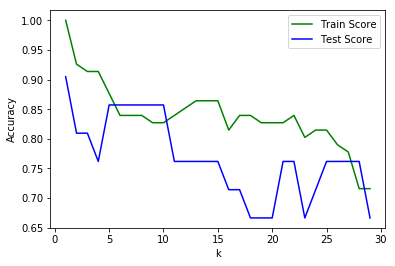

In [514]:
import matplotlib.pyplot as plt
x_axis = range(1,30) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

## Grid Search Algorithm for best k

In [750]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [751]:
vals = range(1,40)
param_grid = {'n_neighbors': vals}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': range(1, 40)}


In [752]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 15, return_train_score = True)
grid_search.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 12 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [753]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.8765
Best parameters: {'n_neighbors': 1}


### Accuracy

In [754]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print("Training Accuracy:",knn.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", knn.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 1.0
Testing Accuracy: 0.9047619047619048


### Predicting Custom Inputs

In [540]:
new_x = [[0.470437,0.530412,0.486742,0.141006], [0.273302,0.402896,0.928058,0.127295] ]
y = knn.predict(new_x)
print(y)

[1 4]


###  Expected Outputs vs Predicted Outputs

In [402]:
predictions = knn.predict(X_test) #Make predictions for the testing data
values = []

for i in zip(y_test, predictions):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,0
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


# Support Vector Classifier (SVC)

### Train SVC

In [626]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Accuracy

In [627]:
print("Training Accuracy:",svclassifier.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", svclassifier.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.8888888888888888
Testing Accuracy: 0.7619047619047619


## Grid Search Algorithm for Optimal Gamma and C Values

### Declaring parameters grid

In [667]:
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
              'gamma':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'kernel': ['linear', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'kernel': ['linear', 'rbf']}


### Training the Grid Search Algorithm with the parameters.

In [668]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### Accuracy

In [669]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.9136
Best parameters: {'gamma': 10, 'C': 5, 'kernel': 'rbf'}


### Expected Outpts vs Predicted Outputs

In [672]:
svclassifier = SVC(kernel='rbf', C = 5, gamma = 10)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)
print(svclassifier.score(X_test, y_test))
values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

0.9523809523809523


,Expected,Predicted
0,1,1
1,5,5
2,0,0
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


# Decision Trees - Gini

### Train Decision Tree

In [676]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 10, max_depth=5, min_samples_leaf=5) 
# Performing training 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

### Accuracy

Training Accuracy: 0.9135802469135802
Testing Accuracy: 0.7619047619047619


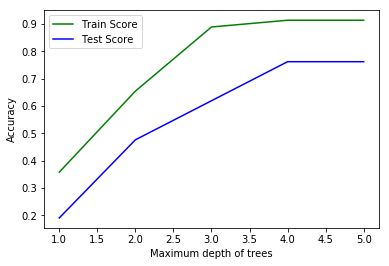

In [677]:
print("Training Accuracy:",clf_gini.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf_gini.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 6):
    clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=k, min_samples_leaf=5)  
    clf.fit(X_train, y_train)
    train_score_array.append(clf.score(X_train, y_train))
    test_score_array.append(clf.score(X_test, y_test))
x_axis = range(1,6) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('Maximum depth of trees')
plt.ylabel('Accuracy')
plt.legend()

### Expected Outputs vs Predicted Outputs

In [520]:
y_pred = clf_gini.predict(X_test)

values = []
for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,0
7,3,3
8,3,3
9,3,3


# Decision Trees - Entropy

### Train Decision Tree

In [482]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 5, min_samples_leaf = 5) 
# Performing training 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Accuracy

Training Accuracy: 0.9135802469135802
Testing Accuracy: 0.7619047619047619


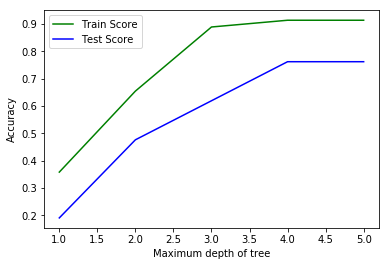

In [483]:
print("Training Accuracy:",clf_entropy.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf_entropy.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 6):
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = k, min_samples_leaf = 5) 
    clf.fit(X_train, y_train)
    train_score_array.append(clf.score(X_train, y_train))
    test_score_array.append(clf.score(X_test, y_test))
x_axis = range(1,6) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.legend()

### Expected Outputs vs Predicted Outputs

In [484]:
y_pred = clf_entropy.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,0
7,3,3
8,3,3
9,3,3


# Decision Tree - Grid Search Algorithm for best parameters

In [684]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']}


In [685]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [689]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.8395
Best parameters: {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'entropy'}


In [690]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 10, max_depth = 4, min_samples_leaf = 1) 
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6666666666666666


# Random Forests

### Train Decision Tree

In [695]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf.fit(X_train, y_train); #n_estimators is the number of decision trees being used.

### Accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.8095238095238095


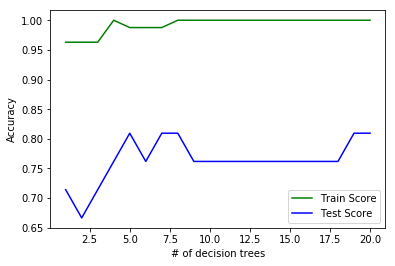

In [694]:
print("Training Accuracy:",rf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", rf.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 21):
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    rf.fit(X_train, y_train)
    train_score_array.append(rf.score(X_train, y_train))
    test_score_array.append(rf.score(X_test, y_test))
x_axis = range(1,21) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('# of decision trees')
plt.ylabel('Accuracy')
plt.legend()

## Grid Search Algorithm for best Random Forest parameters.

In [698]:
param_grid = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'random_state':[42]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'random_state': [42]}


In [699]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [700]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.9012
Best parameters: {'min_samples_leaf': 1, 'n_estimators': 15, 'max_depth': 5, 'random_state': 42}


In [726]:
rf = RandomForestClassifier(n_estimators = 35, random_state = 42, max_depth = 5, min_samples_leaf = 1) 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [727]:
print(rf.score(X_test, y_test))

0.8095238095238095


### Expected Outputs vs Predicted Outputs

In [487]:
y_pred = rf.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,1
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


# Logistic Regression

### Train Regression Model

In [522]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Accuracy

In [523]:
print("Training Accuracy:",lr.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", lr.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.8024691358024691
Testing Accuracy: 0.6666666666666666


## Grid Search Algorithm for Logistic Regression = max_iterations

In [743]:
param_grid = {'max_iter': [50, 100, 200, 500, 1000, 1500],'multi_class': ['ovr', 'auto']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_iter': [50, 100, 200, 500, 1000, 1500], 'multi_class': ['ovr', 'auto']}


In [744]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\si

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [50, 100, 200, 500, 1000, 1500], 'multi_class': ['ovr', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [745]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.7778
Best parameters: {'max_iter': 50, 'multi_class': 'ovr'}


In [746]:
lreg = LogisticRegression(max_iter = 50, multi_class = 'ovr') 
lreg.fit(X_train, y_train)

c:\users\anany\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [747]:
lreg.score(X_test, y_test)

0.6666666666666666

### Expected Outputs vs Predicted Ouputs

In [748]:
y_pred = lr.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,4
7,3,3
8,3,3
9,3,3


# Naive Bayes 

### Train Naive Bayes Classifier

In [749]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Accuracy

In [499]:
print("Training Accuracy:", gnb.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", gnb.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.9506172839506173
Testing Accuracy: 0.7619047619047619


### Expected Outputs vs Predicted Outputs

In [500]:
y_pred = gnb.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,0
3,3,3
4,5,5
5,4,4
6,1,0
7,3,3
8,3,3
9,3,3


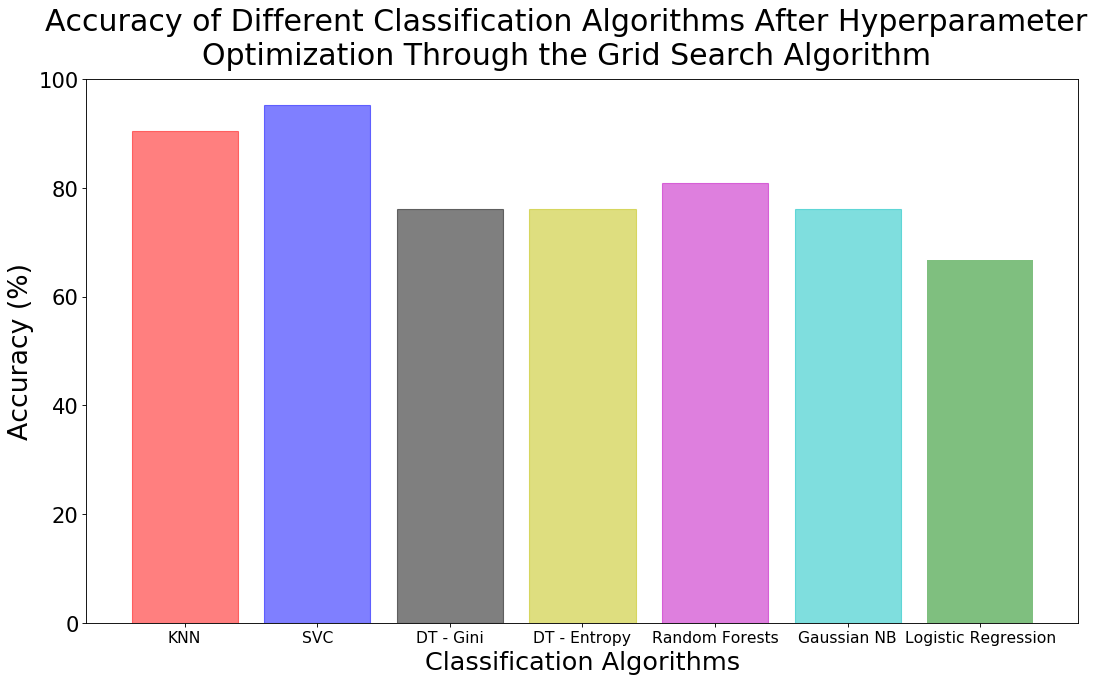

MemoryError: In RendererAgg: Out of memory

<Figure size 1152x648 with 1 Axes>

'\nn_groups = 7\nmeans_frank = (90.47,95.24,76.19, 76.19, 80.95, 66.66, 76.19)\nmeans_guido = (90.47,95.24,76.19, 76.19, 80.95, 66.66, 76.19)\n \n# create plot\nfig, ax = plt.subplots()\nindex = np.arange(n_groups)\nbar_width = 0.2\nopacity = 0.8\n \nrects1 = plt.bar(index, means_frank, bar_width,\n                 alpha=opacity,\n                 color=\'r\',\n                 label=\'Frank\') \n \nrects2 = plt.bar(index + 0.2, means_guido, bar_width,\n                 alpha=opacity,\n                 color=\'g\',\n                 label=\'Guido\')\nplt.xlabel(\'Person\')\nplt.ylabel(\'Scores\')\nplt.title(\'Scores by person\')\nplt.xticks(index + bar_width, (\'KNN\', \'SVC\', \'DT - Gini\', \'DT - Entropy\', \'Random Forests\', \'Linear Regression\', \'Gaussian Naive Bayes\'))\nplt.legend()\n#plt.rcParams["figure.figsize"] = [15, 5]\nplt.tight_layout()\nplt.show()'

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

objects = ('KNN', 'SVC', 'DT - Gini', 'DT - Entropy', 'Random Forests',  'Gaussian NB', 'Logistic Regression')
y_pos = np.arange(len(objects))
performance = [90.47,95.24,76.19, 76.19, 80.95, 76.19, 66.66]
plt.xticks([0,1,2,3,4,5,6], objects, fontsize=14)
plt.yticks([0,20,40,60,80,100], (0,20,40,60,80,100), fontsize=19)
    
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, performance, color = 'g', align='center', alpha=0.5)
#plt.x_ticks.font_size(10)
#plt.xticks(fontsize=14, rotation=90)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('k')
barlist[3].set_color('y')
barlist[4].set_color('m')
barlist[5].set_color('c')

plt.ylabel('Accuracy (%)', size = 24)
#plt.title('\n \nThe accuracy of different classification algorithms on the dataset of facial features after optimization\n of their hyperparameters through the Grid Search Algorithm.')
plt.xlabel("Classification Algorithms", size = 23)
plt.suptitle('Accuracy of Different Classification Algorithms After Hyperparameter\nOptimization Through the Grid Search Algorithm', size = 27)
plt.figure(figsize = [16,9])
#plt.legend()
A = range(7)
for xy in zip(A, performance):                                       # <--
    plt.annotate('%s%%' % xy[1], xy = xy, textcoords='data') # <--
         
plt.show()
